In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('data_set/Country_data.csv')

In [3]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [10]:
df_numerical = df.select_dtypes(include=['float64', 'int64'])

<Axes: >

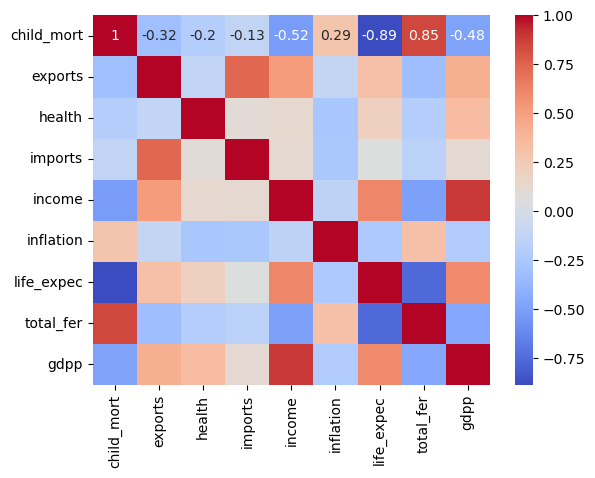

In [12]:
sns.heatmap(df_numerical.corr(),annot = True, cmap = 'coolwarm')

In [14]:
count_data = df[['child_mort', 'imports', 'gdpp']]

In [15]:
count_data

,child_mort,imports,gdpp
0,90.2,44.9,553
1,16.6,48.6,4090
2,27.3,31.4,4460
3,119.0,42.9,3530
4,10.3,58.9,12200
...,...,...,...
162,29.2,52.7,2970
163,17.1,17.6,13500
164,23.3,80.2,1310
165,56.3,34.4,1310


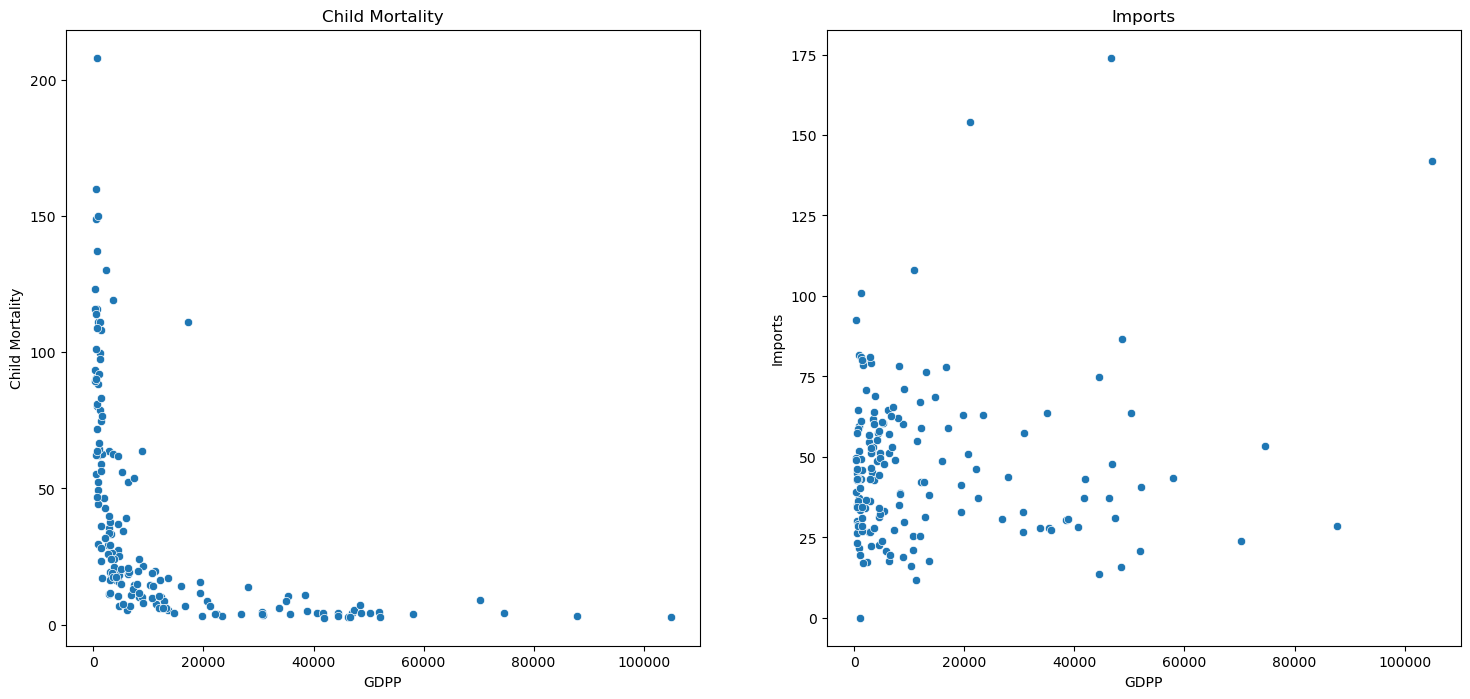

In [20]:
plt.figure(figsize=(18,8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data = count_data)
plt.title('Child Mortality')
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'gdpp', y = 'imports', data = count_data)
plt.title('Imports')
plt.xlabel('GDPP')
plt.ylabel('Imports')
plt.show()

In [24]:
from sklearn.cluster import KMeans

In [33]:
wcss = []
for i in range(1,10):
    km = KMeans( n_clusters=i,init='k-means++')
    km.fit(count_data)
    wcss.append(km.inertia_)

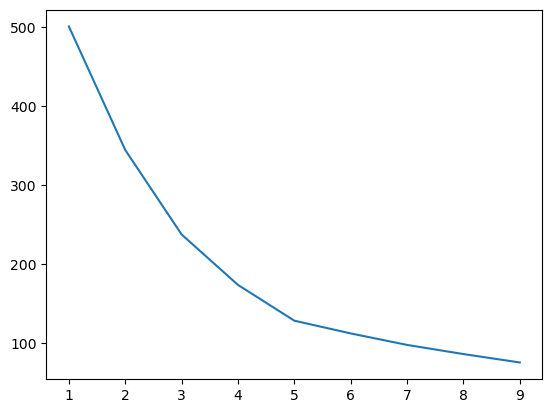

In [34]:
plt.plot(range(1,10),wcss)

In [49]:
count_data

,child_mort,imports,gdpp,cluster
0,1.291532,-0.082455,-0.679180,3
1,-0.538949,0.070837,-0.485623,0
2,-0.272833,-0.641762,-0.465376,1
3,2.007808,-0.165315,-0.516268,3
4,-0.695634,0.497568,-0.041817,0
...,...,...,...,...
162,-0.225578,0.240700,-0.546913,0
163,-0.526514,-1.213499,0.029323,1
164,-0.372315,1.380030,-0.637754,0
165,0.448417,-0.517472,-0.637754,1


In [50]:
std = StandardScaler()
std_df = std.fit_transform(count_data)
count_data = pd.DataFrame(data = std_df,columns = count_data.columns)

In [51]:
count_data

,child_mort,imports,gdpp,cluster
0,1.291532,-0.082455,-0.679180,1.498033
1,-0.538949,0.070837,-0.485623,-1.089948
2,-0.272833,-0.641762,-0.465376,-0.227288
3,2.007808,-0.165315,-0.516268,1.498033
4,-0.695634,0.497568,-0.041817,-1.089948
...,...,...,...,...
162,-0.225578,0.240700,-0.546913,-1.089948
163,-0.526514,-1.213499,0.029323,-0.227288
164,-0.372315,1.380030,-0.637754,-1.089948
165,0.448417,-0.517472,-0.637754,-0.227288


In [74]:
km = KMeans(n_clusters = 5 , init='k-means++')
km.fit(count_data)

KMeans(n_clusters=5)

In [75]:
count_data['cluster'] = km.labels_
count_data

,child_mort,imports,gdpp,cluster
0,1.291532,-0.082455,-0.679180,3
1,-0.538949,0.070837,-0.485623,4
2,-0.272833,-0.641762,-0.465376,0
3,2.007808,-0.165315,-0.516268,3
4,-0.695634,0.497568,-0.041817,4
...,...,...,...,...
162,-0.225578,0.240700,-0.546913,4
163,-0.526514,-1.213499,0.029323,0
164,-0.372315,1.380030,-0.637754,4
165,0.448417,-0.517472,-0.637754,0


In [76]:
from sklearn.metrics import silhouette_score

In [77]:
silhouette_score(count_data,count_data['cluster'])

0.6350135341852245

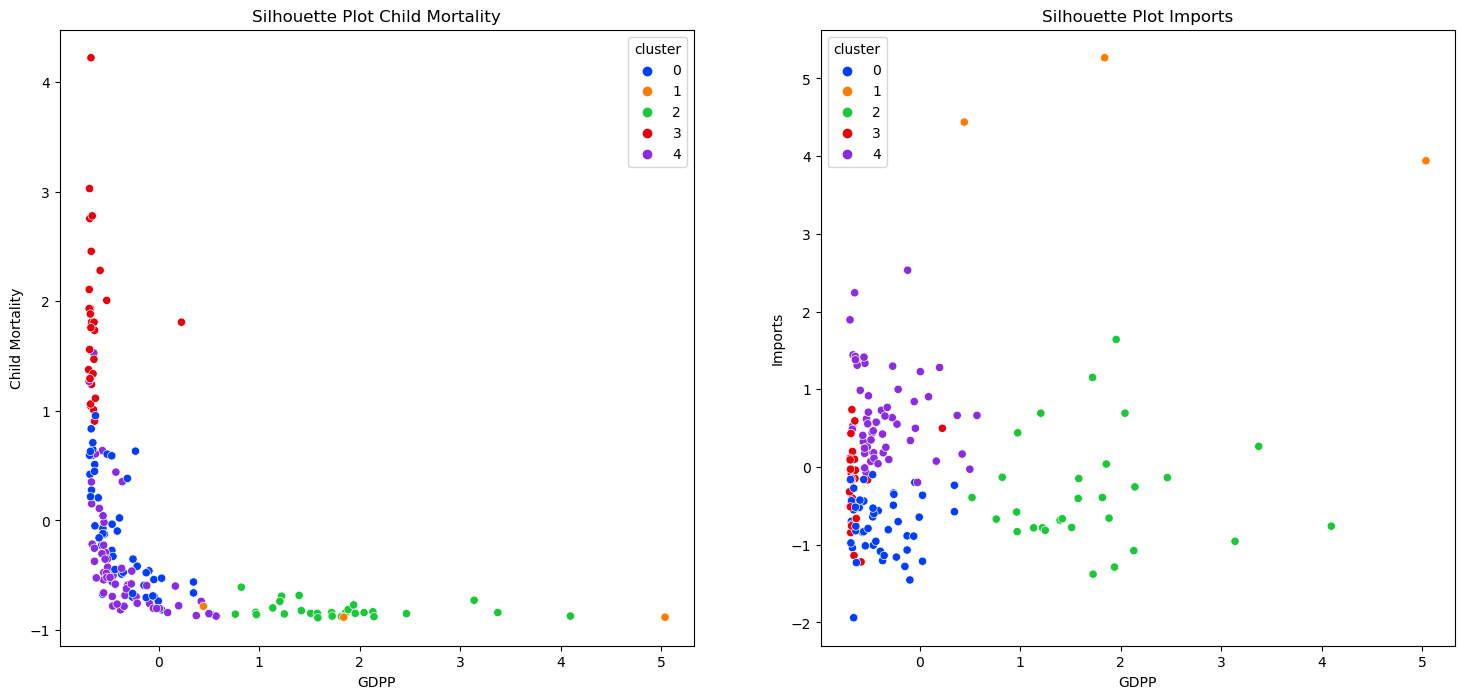

In [81]:
plt.figure(figsize = (18,8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data = count_data, hue = 'cluster', palette = 'bright')
plt.title('Silhouette Plot Child Mortality')
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'gdpp', y = 'imports', data = count_data, hue = 'cluster', palette = 'bright')
plt.title('Silhouette Plot Imports')
plt.xlabel('GDPP')
plt.ylabel('Imports')
plt.show()

In [91]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
count_data = df[['child_mort', 'imports', 'gdpp']]
std = StandardScaler()
std_df = std.fit_transform(count_data)
count_data = pd.DataFrame(data = std_df,columns = count_data.columns)
count_data

,child_mort,imports,gdpp
0,1.291532,-0.082455,-0.679180
1,-0.538949,0.070837,-0.485623
2,-0.272833,-0.641762,-0.465376
3,2.007808,-0.165315,-0.516268
4,-0.695634,0.497568,-0.041817
...,...,...,...
162,-0.225578,0.240700,-0.546913
163,-0.526514,-1.213499,0.029323
164,-0.372315,1.380030,-0.637754
165,0.448417,-0.517472,-0.637754


In [95]:
neighbor = NearestNeighbors( n_neighbors=5)
nbrs = neighbor.fit(count_data)
distance, indices = nbrs.kneighbors(count_data)

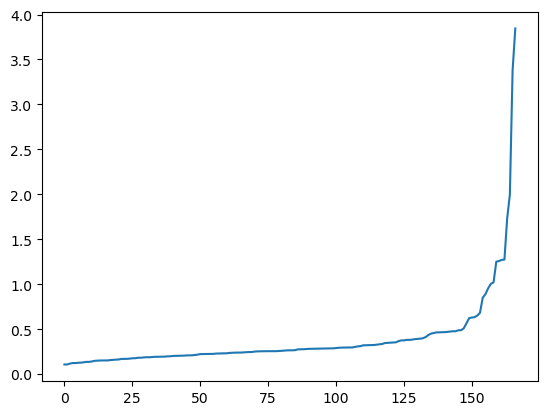

In [101]:
distance = np.sort(distance, axis = 0)
plt.plot(distance[:,2])


In [97]:
distance


array([[0.        , 0.0482105 , 0.10547583, 0.12409124, 0.15930547],
       [0.        , 0.0482105 , 0.10547583, 0.12860154, 0.16109964],
       [0.        , 0.05891659, 0.11491196, 0.13860831, 0.16738991],
       [0.        , 0.05891659, 0.12112289, 0.14582412, 0.16738991],
       [0.        , 0.06170639, 0.12112289, 0.14950126, 0.17127679],
       [0.        , 0.06170639, 0.12409124, 0.15731998, 0.17245364],
       [0.        , 0.0644254 , 0.12636872, 0.16109964, 0.17245364],
       [0.        , 0.0644254 , 0.12860154, 0.17001164, 0.1948191 ],
       [0.        , 0.06660589, 0.1343546 , 0.17001164, 0.19709537],
       [0.        , 0.06660589, 0.1343546 , 0.17019401, 0.2096519 ],
       [0.        , 0.0694984 , 0.1382146 , 0.17105779, 0.20990501],
       [0.        , 0.0694984 , 0.14582412, 0.17127679, 0.21067181],
       [0.        , 0.07022824, 0.14760099, 0.18162137, 0.21145683],
       [0.        , 0.07022824, 0.14950126, 0.18644157, 0.21734372],
       [0.        , 0.08756219, 0.

In [162]:
db = DBSCAN(eps = 1.5,min_samples=4)
db.fit(count_data)
cluster = db.labels_
count_data['cluster'] =cluster 

In [163]:
from sklearn.metrics import silhouette_score
silhouette_score(count_data,cluster)

0.6349965698603972

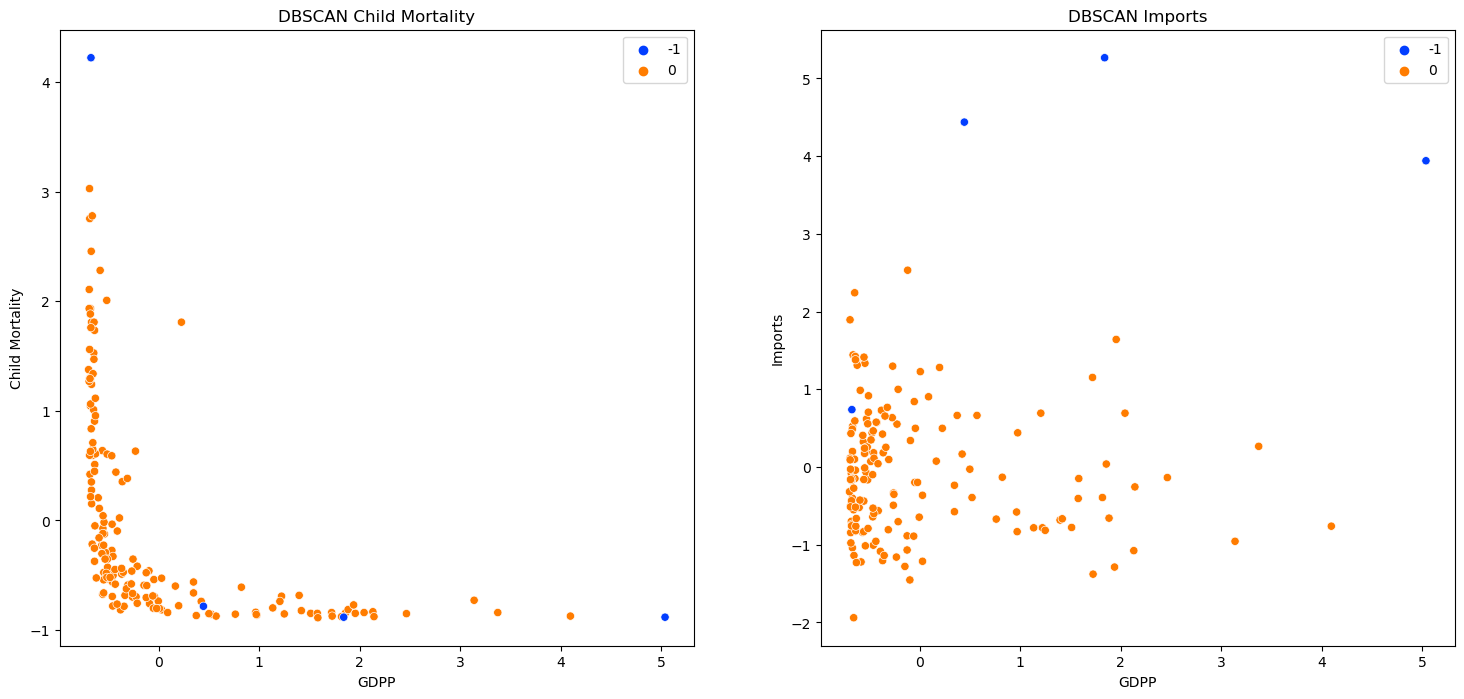

In [164]:
plt.figure(figsize = (18,8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data = count_data, hue = 'cluster', palette = 'bright')
plt.legend(loc = 1)
plt.title('DBSCAN Child Mortality')
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'gdpp', y = 'imports', data = count_data, hue = 'cluster', palette = 'bright')
plt.legend(loc = 1)
plt.title('DBSCAN Imports')
plt.xlabel('GDPP')
plt.ylabel('Imports')
plt.show()